# (201902-Fordgobike-Tripdata)
## by (Loai Muhammed)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df['start_station_id'].nunique()

329

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis = 1, inplace= True)

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [7]:
df.dropna(inplace= True)

In [8]:
#df['from_to']= df['start_station_name']+' to '+df['end_station_name']

In [9]:
df['start_station_name'].nunique()

329

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.4+ MB


In [11]:
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135
std,1642.204905,111.648819,111.335635,1659.195937,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000


In [12]:
#df['start_time']=pd.to_datetime(df['start_time'])
#df['start_time']=pd.to_datetime(df['start_time'])

### What is the structure of your dataset?

> 11 columns , 174952 entries

### What is/are the main feature(s) of interest in your dataset?

> start and end stations name or id and user data

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start and end stations name or id and user data

## Univariate Exploration



In [13]:
base_color = sb.color_palette()[0]

In [14]:
type_counts = df['user_type'].value_counts()
n_users = df['user_type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_users
tick_props = np.arange(0, max_prop, 0.1)
tick_props
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '0.10',
 '0.20',
 '0.30',
 '0.40',
 '0.50',
 '0.60',
 '0.70',
 '0.80',
 '0.90']

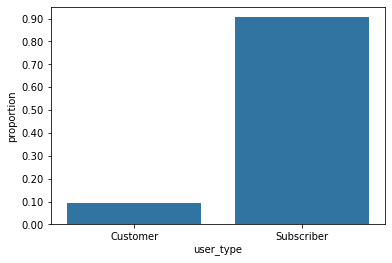

In [15]:
sb.countplot(data=df, x='user_type', color=base_color);
plt.yticks(tick_props * n_users, tick_names)
plt.ylabel('proportion');

looks like about 90% of users are subscribers , lets explore the year of the bikes users 

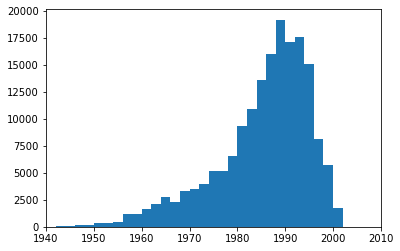

In [16]:
bins = np.arange(0, df['member_birth_year'].max()+2,2)
plt.hist(data = df, x = 'member_birth_year', bins = bins);
plt.xlim((1940,2010));

wow! most of the users were born from 1980 to 1995, but is the gender affects the number of users ?

In [17]:
gender_counts = df['member_gender'].value_counts()
n_users_gender = df['user_type'].value_counts().sum()

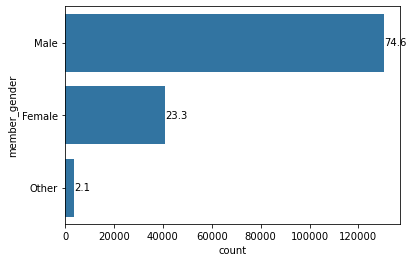

In [18]:
freq = df['member_gender'].value_counts()
gen_order = freq.index
sb.countplot(data=df, y='member_gender', color=base_color, order=gen_order);
for i in range (gender_counts.shape[0]):
    count = gender_counts[i]
    pct_string = '{:0.1f}'.format(100*count/n_users_gender)
    plt.text(count+1, i, pct_string, va='center')

more men rent bikes than women , does all the users ride their bikes for the same amount of time ?!

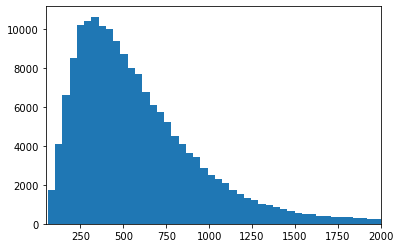

In [19]:
plt.hist(data = df, x = 'duration_sec', bins = 2000);
plt.xlim((50,2000));

It seems like most users rent their bikes for short time ~ 200 to 400 secs , are some stations  more crowded than others ?

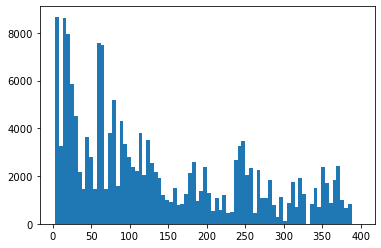

In [20]:
plt.hist(data = df, x = 'end_station_id', bins = 80);

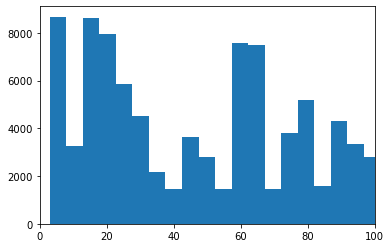

In [21]:
plt.hist(data = df, x = 'end_station_id', bins = 80);
plt.xlim((0,100));

users mostly use stations with id less than 10 ,near 20s and 60s as the end station

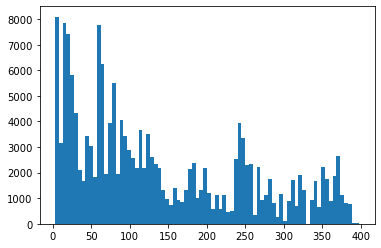

In [22]:
plt.hist(data = df, x = 'start_station_id', bins = 80);

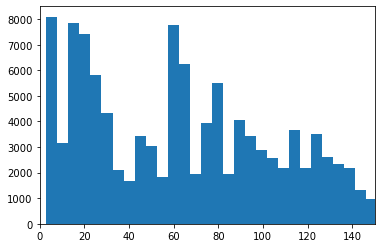

In [23]:
plt.hist(data = df, x = 'start_station_id', bins = 80);
plt.xlim((0,150));

users mostly use stations with id near 20s and 60s as the start station 
looks like those stations are in high poplulation area as they are mostly used as start and end stations


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>I had to limit the axis for some of them because most of the points are grouped in narrow value ranges,and no didn't need to transform anything
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no unusual distributions , and no operations were needed to be performed

## Bivariate Exploration


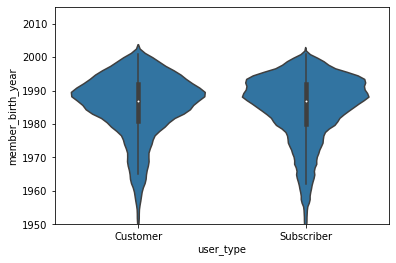

In [24]:
users_t = ['Customer', 'Subscriber']
use_type = pd.api.types.CategoricalDtype(ordered=True, categories= users_t)
df['user_type'] = df['user_type'].astype(use_type);
sb.violinplot(data=df, x='user_type', y='member_birth_year', color=base_color);
plt.ylim((1950,2015));

more subscribers were born after 1990 than customers , lets explore the relation between gender and birth year

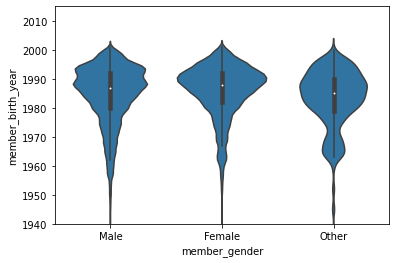

In [25]:
users_g = ['Male', 'Female','Other']
use_gen = pd.api.types.CategoricalDtype(ordered=True, categories= users_g)
df['member_gender'] = df['member_gender'].astype(use_gen);
sb.violinplot(data=df, x='member_gender', y='member_birth_year', color=base_color);
plt.ylim((1940,2015));

more female users were born in 1990 than males but more male than females were born before 1990 ,does gender affects the number of subscribers ?

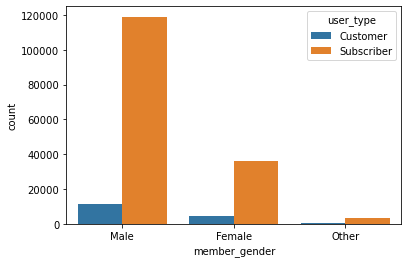

In [26]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');

hard to say if females tends to subscribe more than males or not , let's try to explore the relation between birth year and rent duration

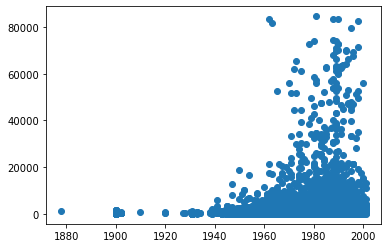

In [41]:
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec');

so the yonger the person the more time they rent bikes, but does gender affect duration?

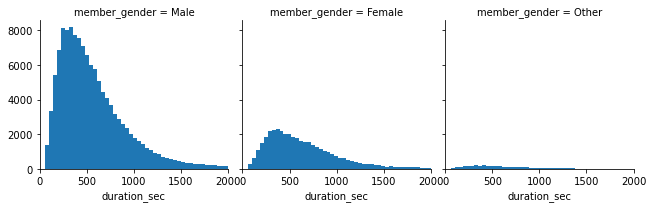

In [28]:
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.hist, "duration_sec",bins = 2000)
plt.xlim((0,2000));

males tends to rent bike for more time,does user type also affect time ?

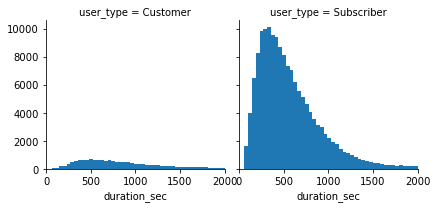

In [29]:
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "duration_sec",bins = 2000)
plt.xlim((0,2000));

it seems to be yes user type affects duration

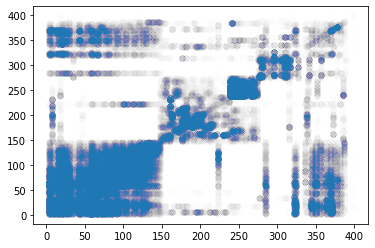

In [45]:
plt.scatter( data= df,x='start_station_id',y='end_station_id',alpha=1/200);

the start station tends to be the end station

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> looks like gender,birth year and user type affects rent duration ,and gender has a relation with being a sbscriber or a customer

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the start station tends to be the end station 

## Multivariate Exploration



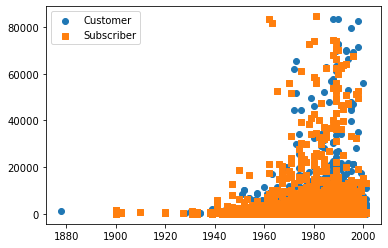

In [48]:
usert_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for usert, marker in usert_markers:
    df_usert = df[df['user_type'] == usert]
    plt.scatter(data = df_usert, x = 'member_birth_year', y = 'duration_sec', marker = marker);
plt.legend(['Customer','Subscriber']);

before 1920 almost all users are sbscribers and subscribers tends to rent for shorter time

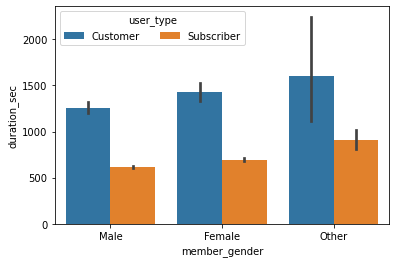

In [31]:
ax = sb.barplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 'upper left', ncol = 2, title = 'user_type');

other customers have the highest mean rent duration

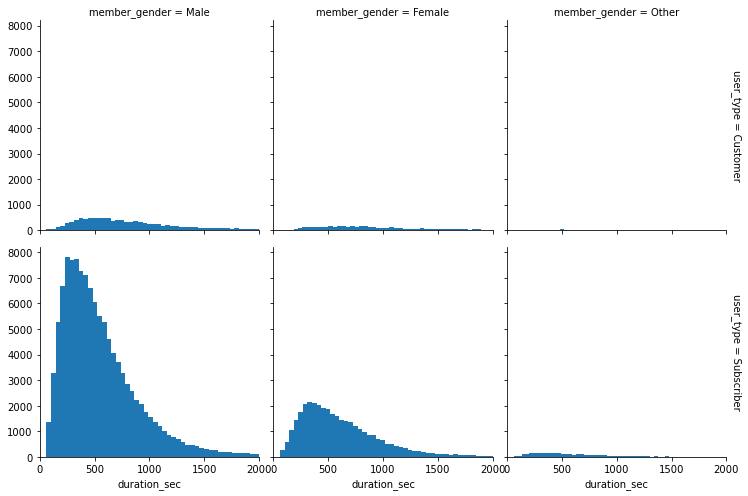

In [32]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 3.5,
                margin_titles = True)
g.map(plt.hist, 'duration_sec',bins = 2000)
plt.xlim((0,2000));

male subscribers has the most short rent duration

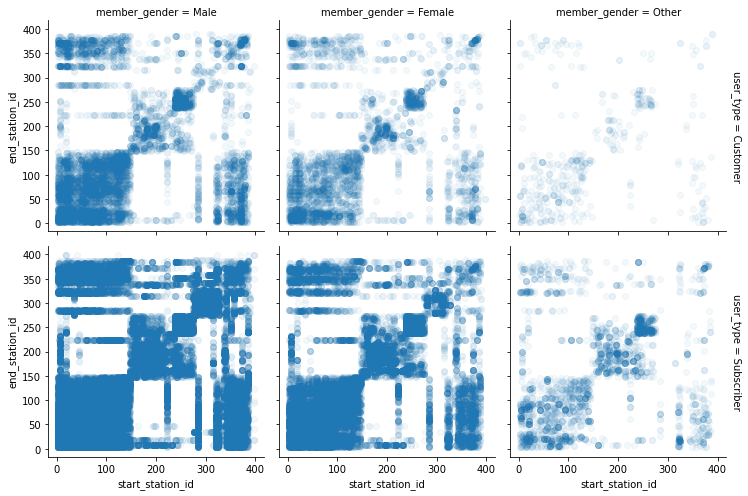

In [33]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 3.5,
                margin_titles = True)
g.map(plt.scatter, 'start_station_id','end_station_id',alpha=1/20);

nothing new still most users use the start staion as the end station  

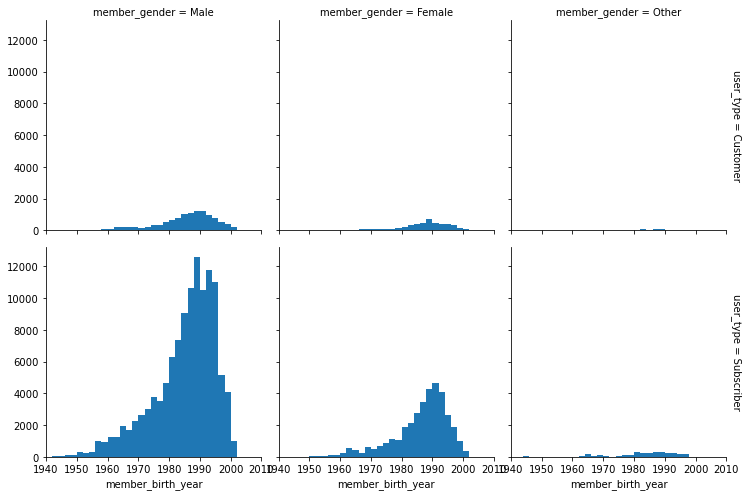

In [34]:
bins = np.arange(0, df['member_birth_year'].max()+2,2)
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 3.5,
                margin_titles = True)
g.map(plt.hist, 'member_birth_year',bins = bins)
plt.xlim((1940,2010));

also most of 1980 to 1995 subscribers are males

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> before 1920 almost all users are sbscribers and subscribers tends to rent for shorter time ,also most of 1980 to 1995 subscribers are males , yes they strengthened each other

### Were there any interesting or surprising interactions between features?

> not really